# SU2020 track cuts

## Preamble

In [4]:
# External packages
import sys
import warnings
warnings.filterwarnings("ignore") # suppress warnings
import matplotlib.pyplot as plt
import awkward as ak

# pyutils classes
from pyutils.pylogger import Logger
from pyutils.pyplot import Plot
from pyutils.pyselect import Select

# mu2e-cosmic classes
sys.path.extend(["../../src/utils", "../../src/core"])
from io_manager import Load
from analyse import Analyse # just for pitch angle

logger = Logger()

## Load data

Compare au and aw 

In [5]:
datasets = ["CRY MDC2020au", "CRY MDC2020aw", "CeEndpoint MDC2020au", "CeEndpoint MDC2020aw"]

In [6]:
!ls -ltrh ../../../output/results/

total 0
drwxr-xr-x. 2 sgrant fnalgrid 7 Aug  5 07:38 ana_alpha_CRYOffspill-LH_as


In [8]:
ana_labels = {
    # datasets[0]: "preselection_CRY_onspill-LH_aq",
    datasets[0]: "preselection_CRY_onspill-LH_au",
    datasets[1]: "preselection_CRY_onspill-LH_aw",
    # datasets[3]: "preselection_signal_onspill-LH_aq",
    datasets[2]: "preselection_signal_onspill-LH_au",
    datasets[3]: "preselection_signal_onspill-LH_aw",
}

results = {}
for key, ana_label in ana_labels.items():
    loader = Load(
        in_path = f"../../output/results/{ana_label}"
    )
    results[key] = loader.load_pkl()     

[Load] ✅ Initialised with out_path=../../output/results/preselection_CRY_onspill-LH_au
[Load] ✅ Successfully loaded results from ../../output/results/preselection_CRY_onspill-LH_au/results.pkl
[Load] ✅ Initialised with out_path=../../output/results/preselection_CRY_onspill-LH_aw
[Load] ✅ Successfully loaded results from ../../output/results/preselection_CRY_onspill-LH_aw/results.pkl
[Load] ✅ Initialised with out_path=../../output/results/preselection_signal_onspill-LH_au
[Load] ✅ Successfully loaded results from ../../output/results/preselection_signal_onspill-LH_au/results.pkl
[Load] ✅ Initialised with out_path=../../output/results/preselection_signal_onspill-LH_aw
[Load] ✅ Successfully loaded results from ../../output/results/preselection_signal_onspill-LH_aw/results.pkl


## Cutflow

In [9]:
for label, result in results.items(): 
    logger.log(label, "info")
    display(result["cut_flow"].round(3))

[pylogger] ⭐️ CRY MDC2020au


,Cut,Group,Events Passing,Absolute [%],Relative [%],Description
0,No cuts,NaN,267495,100.000,100.000,No selection applied
1,has_trk_front,Preselect,267265,99.914,99.914,Tracks intersect tracker entrance
2,is_reco_electron,Preselect,256419,95.859,95.942,Electron track fits
3,is_downstream,Preselect,155733,58.219,60.734,Downstream tracks (p_z > 0 at tracker entrance)
4,one_reco_electron,Preselect,111853,41.815,71.824,One reco electron / event
5,is_truth_electron,Preselect,33212,12.416,29.693,Track parents are electrons (truth PID)


[pylogger] ⭐️ CRY MDC2020aw


,Cut,Group,Events Passing,Absolute [%],Relative [%],Description
0,No cuts,NaN,308264,100.000,100.000,No selection applied
1,has_trk_front,Preselect,302256,98.051,98.051,Tracks intersect tracker entrance
2,is_reco_electron,Preselect,292440,94.867,96.752,Electron track fits
3,is_downstream,Preselect,179262,58.152,61.299,Downstream tracks (p_z > 0 at tracker entrance)
4,one_reco_electron,Preselect,133090,43.174,74.243,One reco electron / event
5,is_truth_electron,Preselect,38453,12.474,28.892,Track parents are electrons (truth PID)


[pylogger] ⭐️ CeEndpoint MDC2020au


,Cut,Group,Events Passing,Absolute [%],Relative [%],Description
0,No cuts,NaN,145542,100.000,100.000,No selection applied
1,has_trk_front,Preselect,145509,99.977,99.977,Tracks intersect tracker entrance
2,is_reco_electron,Preselect,142980,98.240,98.262,Electron track fits
3,is_downstream,Preselect,142970,98.233,99.993,Downstream tracks (p_z > 0 at tracker entrance)
4,one_reco_electron,Preselect,142591,97.972,99.735,One reco electron / event
5,is_truth_electron,Preselect,142591,97.972,100.000,Track parents are electrons (truth PID)


[pylogger] ⭐️ CeEndpoint MDC2020aw


,Cut,Group,Events Passing,Absolute [%],Relative [%],Description
0,No cuts,NaN,147706,100.000,100.000,No selection applied
1,has_trk_front,Preselect,147673,99.978,99.978,Tracks intersect tracker entrance
2,is_reco_electron,Preselect,147534,99.884,99.906,Electron track fits
3,is_downstream,Preselect,147533,99.883,99.999,Downstream tracks (p_z > 0 at tracker entrance)
4,one_reco_electron,Preselect,147114,99.599,99.716,One reco electron / event
5,is_truth_electron,Preselect,147113,99.599,99.999,Track parents are electrons (truth PID)


In [ ]:


# from pyutils.pyprint import Print
# printer = Print()

# printer.print_n_events(results["CRY MDC2020au"]["events"])

## Select tracker front

In [ ]:
# help(selector.select_surface)

In [10]:
# Filter tracker entrance
selector = Select()

# Applies to results[dataset]["events"]
def surface_cut(arr, surface_name="TT_Front"): 
    # for label, result in results.items():
    # Copy
    arr_cut = ak.copy(arr)
    # Track front 
    at_trk_front = selector.select_surface(arr_cut["trkfit"], surface_name=surface_name) # trksegs-level
    has_trk_front = ak.any(at_trk_front, axis=-1)
    # Cut
    # arr_cut["trk"] = arr_cut["trk"][at_trk_front]
    arr_cut["trkfit"] = arr_cut["trkfit"][at_trk_front]
    # Then clean up events with no tracks after cuts
    arr_cut = arr_cut[ak.any(has_trk_front, axis=-1)]
    # Return filtered array
    return arr_cut

results_BK = results.copy()
for label, result in results.items():
    results[label]["events"] = surface_cut(results[label]["events"])

[pyselect] ✅ Returning mask for trksegs with sid = 0
[pyselect] ✅ Returning mask for trksegs with sid = 0
[pyselect] ✅ Returning mask for trksegs with sid = 0
[pyselect] ✅ Returning mask for trksegs with sid = 0


## Array flattener

In [11]:
# results["CRY MDC2020au"]["events"].keys()

In [75]:
analyse = Analyse() 

def get_flat_arrays(results, labels=None):
    
    # Init arrays (a bit ugly but whatever)
    trkqual, nactive, t0err, d0, lhr_max, pitch_angle = {}, {}, {}, {}, {}, {}
    # Loop through results
    for label, result in results.items(): 
        if labels is not None and label not in labels: 
            continue
        # flatten 
        trkqual[label] = ak.flatten(result["events"]["trk"]["trkqual.result"], axis=None)
        nactive[label] = ak.flatten(result["events"]["trk"]["trk.nactive"], axis=None)
        t0err[label] = ak.flatten(result["events"]["trkfit"]["trksegpars_lh"]["t0err"], axis=None)
        d0[label] = ak.flatten(result["events"]["trkfit"]["trksegpars_lh"]["d0"], axis=None)
        lhr_max[label] = ak.flatten(result["events"]["trkfit"]["trksegpars_lh"]["maxr"], axis=None)
        
        pitch_angle[label] = ak.flatten(analyse.get_pitch_angle(result["events"]["trkfit"]), axis=None)

    return trkqual, nactive, t0err, d0, lhr_max, pitch_angle

trkqual, nactive, t0err, d0, lhr_max, pitch_angle = get_flat_arrays(results)


[pyvector] ⭐️ Initialised Vector with verbosity = 1
[Analyse] ⭐️ Initialised with:
  on_spill        = False
  cut_config_path = /home/sgrant/mu2e-cosmic/src/core/../../config/common/cuts.yaml
  cutset_name     = alpha (baseline cutset with loop helix parameters)
  verbosity       = 1
[pyvector] ✅ Created 3D 'mom' vector
[pyvector] ✅ Created 3D 'mom' vector
[pyvector] ✅ Created 3D 'mom' vector
[pyvector] ✅ Created 3D 'mom' vector


## Plot trkqual and t0 

In [13]:
trkqual

{'CRY MDC2020au': <Array [0.779, 0.987, 0.0317, ..., 0.835, 0.94, 0.0386] type='33212 * float32'>,
 'CRY MDC2020aw': <Array [0.613, 0.92, 0.0712, ..., 0.264, 0.682, 0.842] type='38453 * float32'>,
 'CeEndpoint MDC2020au': <Array [0.988, 0.935, 0.941, ..., 0.966, 0.394, 0.13] type='142591 * float32'>,
 'CeEndpoint MDC2020aw': <Array [0.924, 0.982, 0.126, ..., 0.951, 0.961, 0.766] type='147113 * float32'>}

In [14]:
plotter = Plot()

[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1


[pylogger] ✅ 	Wrote ../../output/images/comp/h1o_3x2_trk_params_au_aw_no_lines.png


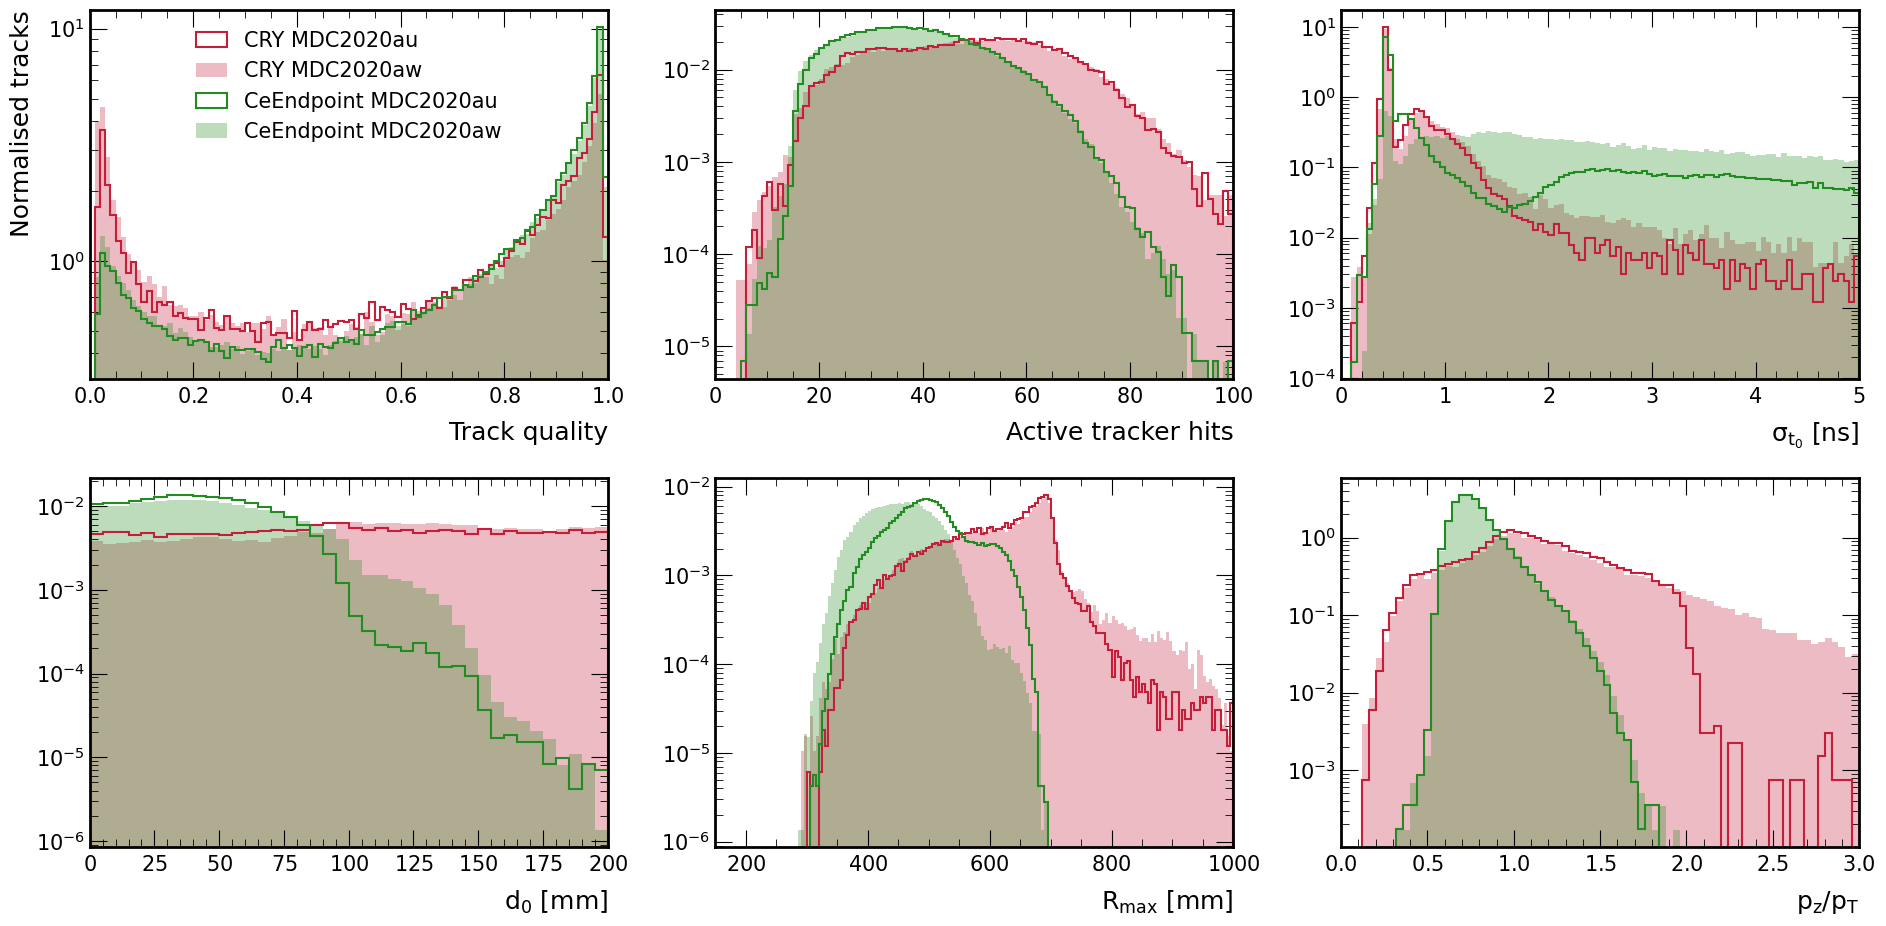

In [76]:
fig, ax = plt.subplots(2, 3, figsize=(3*6.4, 2*4.8))

styles = {
    datasets[0] : {"color": "#C41E3A"},
    # datasets[1] : {"color": "#C41E3A", "linestyle": "--"},
    datasets[1] : {"color": "#C41E3A", "histtype": "bar"},
    datasets[2] : {"color": "#228B22"},
    datasets[3] : {"color": "#228B22", "histtype": "bar"},
    # datasets[5] : {"color": "#228B22", "linestyle": "--"}
}

plotter.plot_1D_overlay(
    trkqual,
    nbins=100,
    xmin=0,
    xmax=1,
    xlabel="Track quality",
    ylabel="Normalised tracks",
    # title=suface_name,
    styles=styles,
    norm_by_area=True,
    leg=True,
    show=False,
    ax=ax[0,0],
    log_y=True
)

plotter.plot_1D_overlay(
    nactive,
    nbins=100,
    xmin=0,
    xmax=100,
    xlabel="Active tracker hits",
    # ylabel="Normalised tracks",
    # title=suface_name,
    styles=styles,
    norm_by_area=True,
    leg=False,
    show=False,
    ax=ax[0,1],
    log_y=True
)

plotter.plot_1D_overlay(
    t0err,
    nbins=100,
    xmin=0,
    xmax=5,
    xlabel=r"$\sigma_{t_{0}}$ [ns]",
    # title=suface_name,
    styles=styles,
    norm_by_area=True,
    leg=False,
    show=False,
    ax=ax[0,2],
    log_y=True
)


plotter.plot_1D_overlay(
    d0,
    nbins=40,
    xmin=0,
    xmax=200,
    xlabel=r"$d_{0}$ [mm]",
    # title=suface_name,
    styles=styles,
    norm_by_area=True,
    leg=False,
    show=False,
    ax=ax[1,0],
    log_y=True
)

plotter.plot_1D_overlay(
    lhr_max,
    nbins=170,
    xmin=150,
    xmax=1000,
    xlabel=r"$R_{\text{max}}$ [mm]",
    # title=suface_name,
    styles=styles,
    norm_by_area=True,
    leg=False,
    show=False,
    ax=ax[1,1],
    log_y=True
)

plotter.plot_1D_overlay(
    pitch_angle,
    nbins=75,
    xmin=0,
    xmax=3.0,
    xlabel=r"$p_{z}/p_{T}$", 
    # title=suface_name,
    styles=styles,
    norm_by_area=True,
    leg=False,
    show=False,
    ax=ax[1,2],
    log_y=True
)


plt.tight_layout()
out_path = "../../output/images/comp/h1o_3x2_trk_params_au_aw_no_lines.png"
plt.savefig(out_path, dpi=300)
logger.log(f"\tWrote {out_path}", "success")
plt.show()

In [18]:
trkqual.keys()

dict_keys(['CRY MDC2020au', 'CRY MDC2020aw', 'CeEndpoint MDC2020au', 'CeEndpoint MDC2020aw'])

[pyvector] ✅ Created 3D 'mom' vector
[pyvector] ✅ Created 3D 'mom' vector
[pylogger] ✅ 	Wrote ../../output/images/comp/h1o_2x3_trk_params_aw_no_lines.png


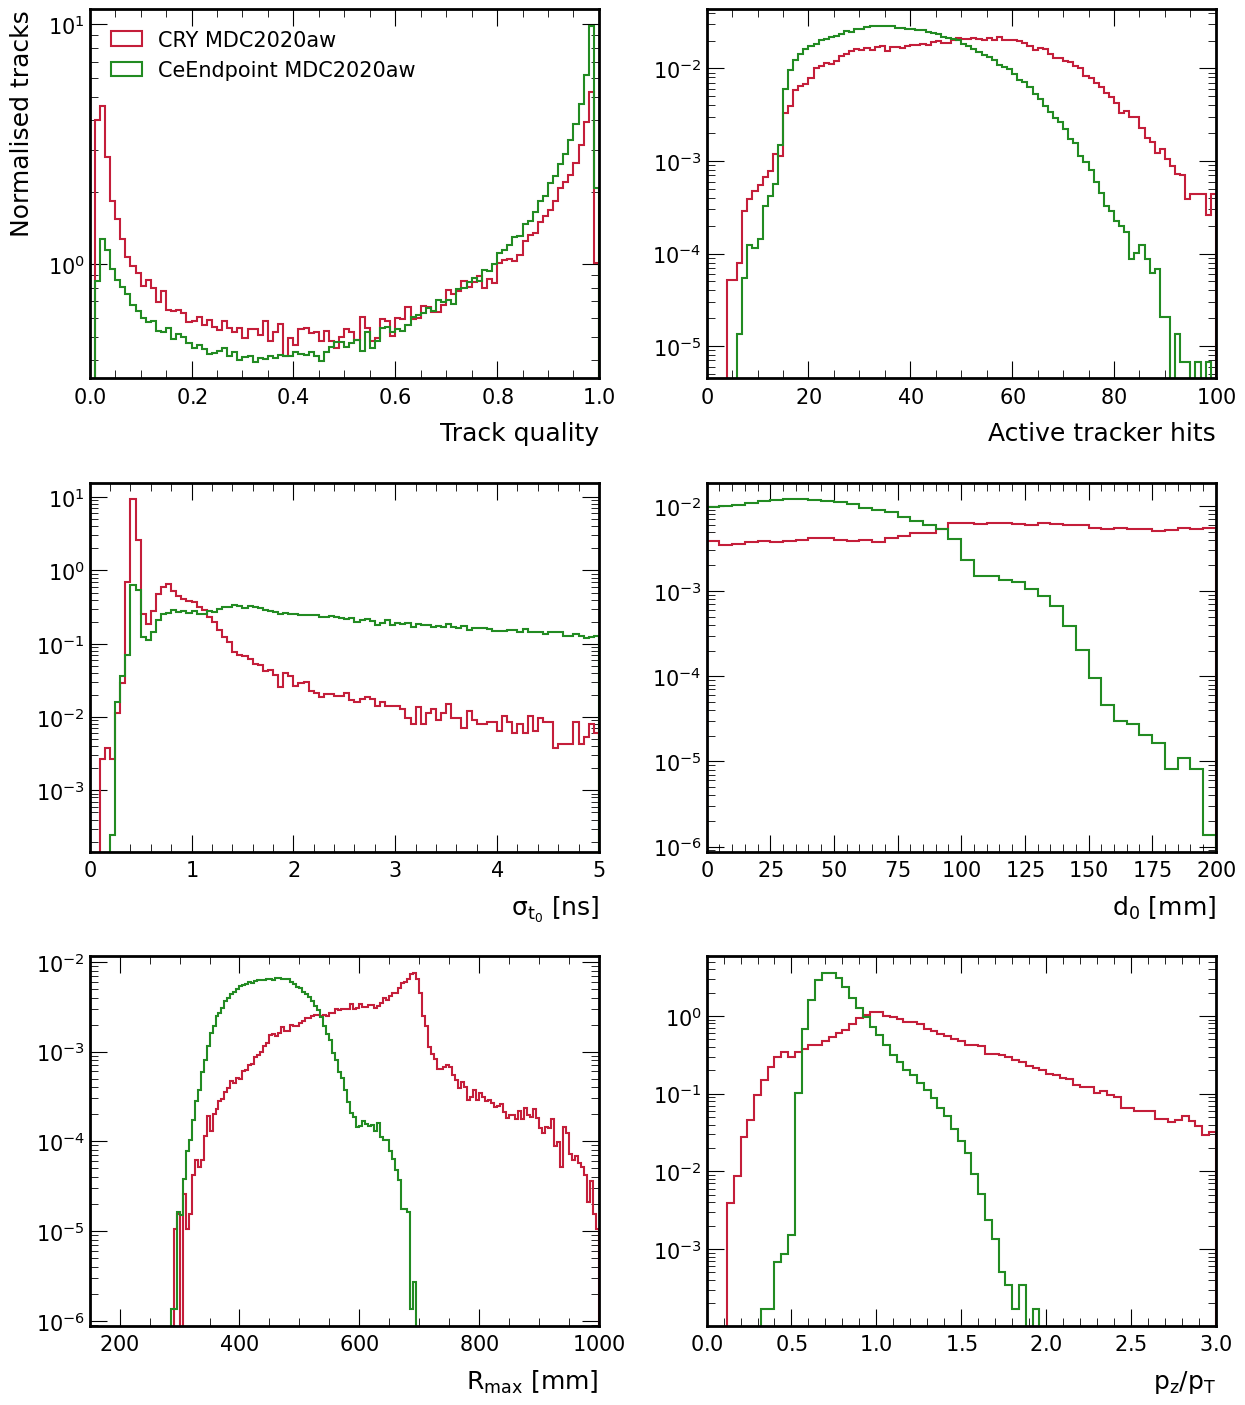

In [22]:
trkqual, nactive, t0err, d0, lhr_max, pitch_angle = get_flat_arrays(results, labels = ["CRY MDC2020aw", "CeEndpoint MDC2020aw"])

fig, ax = plt.subplots(3, 2, figsize=(2*6.4, 3*4.8))

styles = {
    # datasets[0] : {"color": "#C41E3A"},
    # datasets[1] : {"color": "#C41E3A", "linestyle": "--"},
    datasets[1] : {"color": "#C41E3A"}, # , "histtype": "bar"},
    # datasets[2] : {"color": "#228B22"},
    datasets[3] : {"color": "#228B22"}, # , "histtype": "bar"},
    # datasets[5] : {"color": "#228B22", "linestyle": "--"}
}

plotter.plot_1D_overlay(
    trkqual,
    nbins=100,
    xmin=0,
    xmax=1,
    xlabel="Track quality",
    ylabel="Normalised tracks",
    # title=suface_name,
    styles=styles,
    norm_by_area=True,
    leg=True,
    show=False,
    ax=ax[0,0],
    log_y=True
)

plotter.plot_1D_overlay(
    nactive,
    nbins=100,
    xmin=0,
    xmax=100,
    xlabel="Active tracker hits",
    # ylabel="Normalised tracks",
    # title=suface_name,
    styles=styles,
    norm_by_area=True,
    leg=False,
    show=False,
    ax=ax[0,1],
    log_y=True
)

plotter.plot_1D_overlay(
    t0err,
    nbins=100,
    xmin=0,
    xmax=5,
    xlabel=r"$\sigma_{t_{0}}$ [ns]",
    # title=suface_name,
    styles=styles,
    norm_by_area=True,
    leg=False,
    show=False,
    ax=ax[1,0],
    log_y=True
)


plotter.plot_1D_overlay(
    d0,
    nbins=40,
    xmin=0,
    xmax=200,
    xlabel=r"$d_{0}$ [mm]",
    # title=suface_name,
    styles=styles,
    norm_by_area=True,
    leg=False,
    show=False,
    ax=ax[1,1],
    log_y=True
)

plotter.plot_1D_overlay(
    lhr_max,
    nbins=170,
    xmin=150,
    xmax=1000,
    xlabel=r"$R_{\text{max}}$ [mm]",
    # title=suface_name,
    styles=styles,
    norm_by_area=True,
    leg=False,
    show=False,
    ax=ax[2,0],
    log_y=True
)

plotter.plot_1D_overlay(
    pitch_angle,
    nbins=75,
    xmin=0,
    xmax=3.0,
    xlabel=r"$p_{z}/p_{T}$", 
    # title=suface_name,
    styles=styles,
    norm_by_area=True,
    leg=False,
    show=False,
    ax=ax[2,1],
    log_y=True
)


plt.tight_layout()
out_path = "../../output/images/comp/h1o_2x3_trk_params_aw_no_lines.png"
plt.savefig(out_path, dpi=300)
logger.log(f"\tWrote {out_path}", "success")
plt.show()

## Correlations 

In [26]:
help(plotter.plot_2D_overlay)

Help on method plot_2D_overlay in module pyutils.pyplot:

plot_2D_overlay(x1, y1, x2, y2, weights1=None, weights2=None, nbins_x=100, xmin=-1.0, xmax=1.0, nbins_y=100, ymin=-1.0, ymax=1.0, title=None, xlabel=None, ylabel=None, zlabel=None, out_path=None, cmap1='Blues', cmap2='Reds', alpha=0.7, dpi=300, log_x=False, log_y=False, log_z=False, show_cbar=False, leg_pos='best', ax=None, show=True, labels=None) method of pyutils.pyplot.Plot instance
    Plot two overlaid 2D histograms from two pairs of arrays with different colourmaps.

    Args:
        x1, y1 (np.ndarray): Arrays for first dataset
        x2, y2 (np.ndarray): Arrays for second dataset
        weights1, weights2 (np.ndarray, optional): Optional weights for each dataset
        nbins_x (int): Number of bins in x. Defaults to 100
        xmin (float): Minimum x value. Defaults to -1.0
        xmax (float): Maximum x value. Defaults to 1.0
        nbins_y (int): Number of bins in y. Defaults to 100
        ymin (float): Minimum

[pyvector] ✅ Created 3D 'mom' vector
[pyvector] ✅ Created 3D 'mom' vector
Wrote ../../output/images/comp/h2o_all_combinations_trk_params_overlay_aw.png


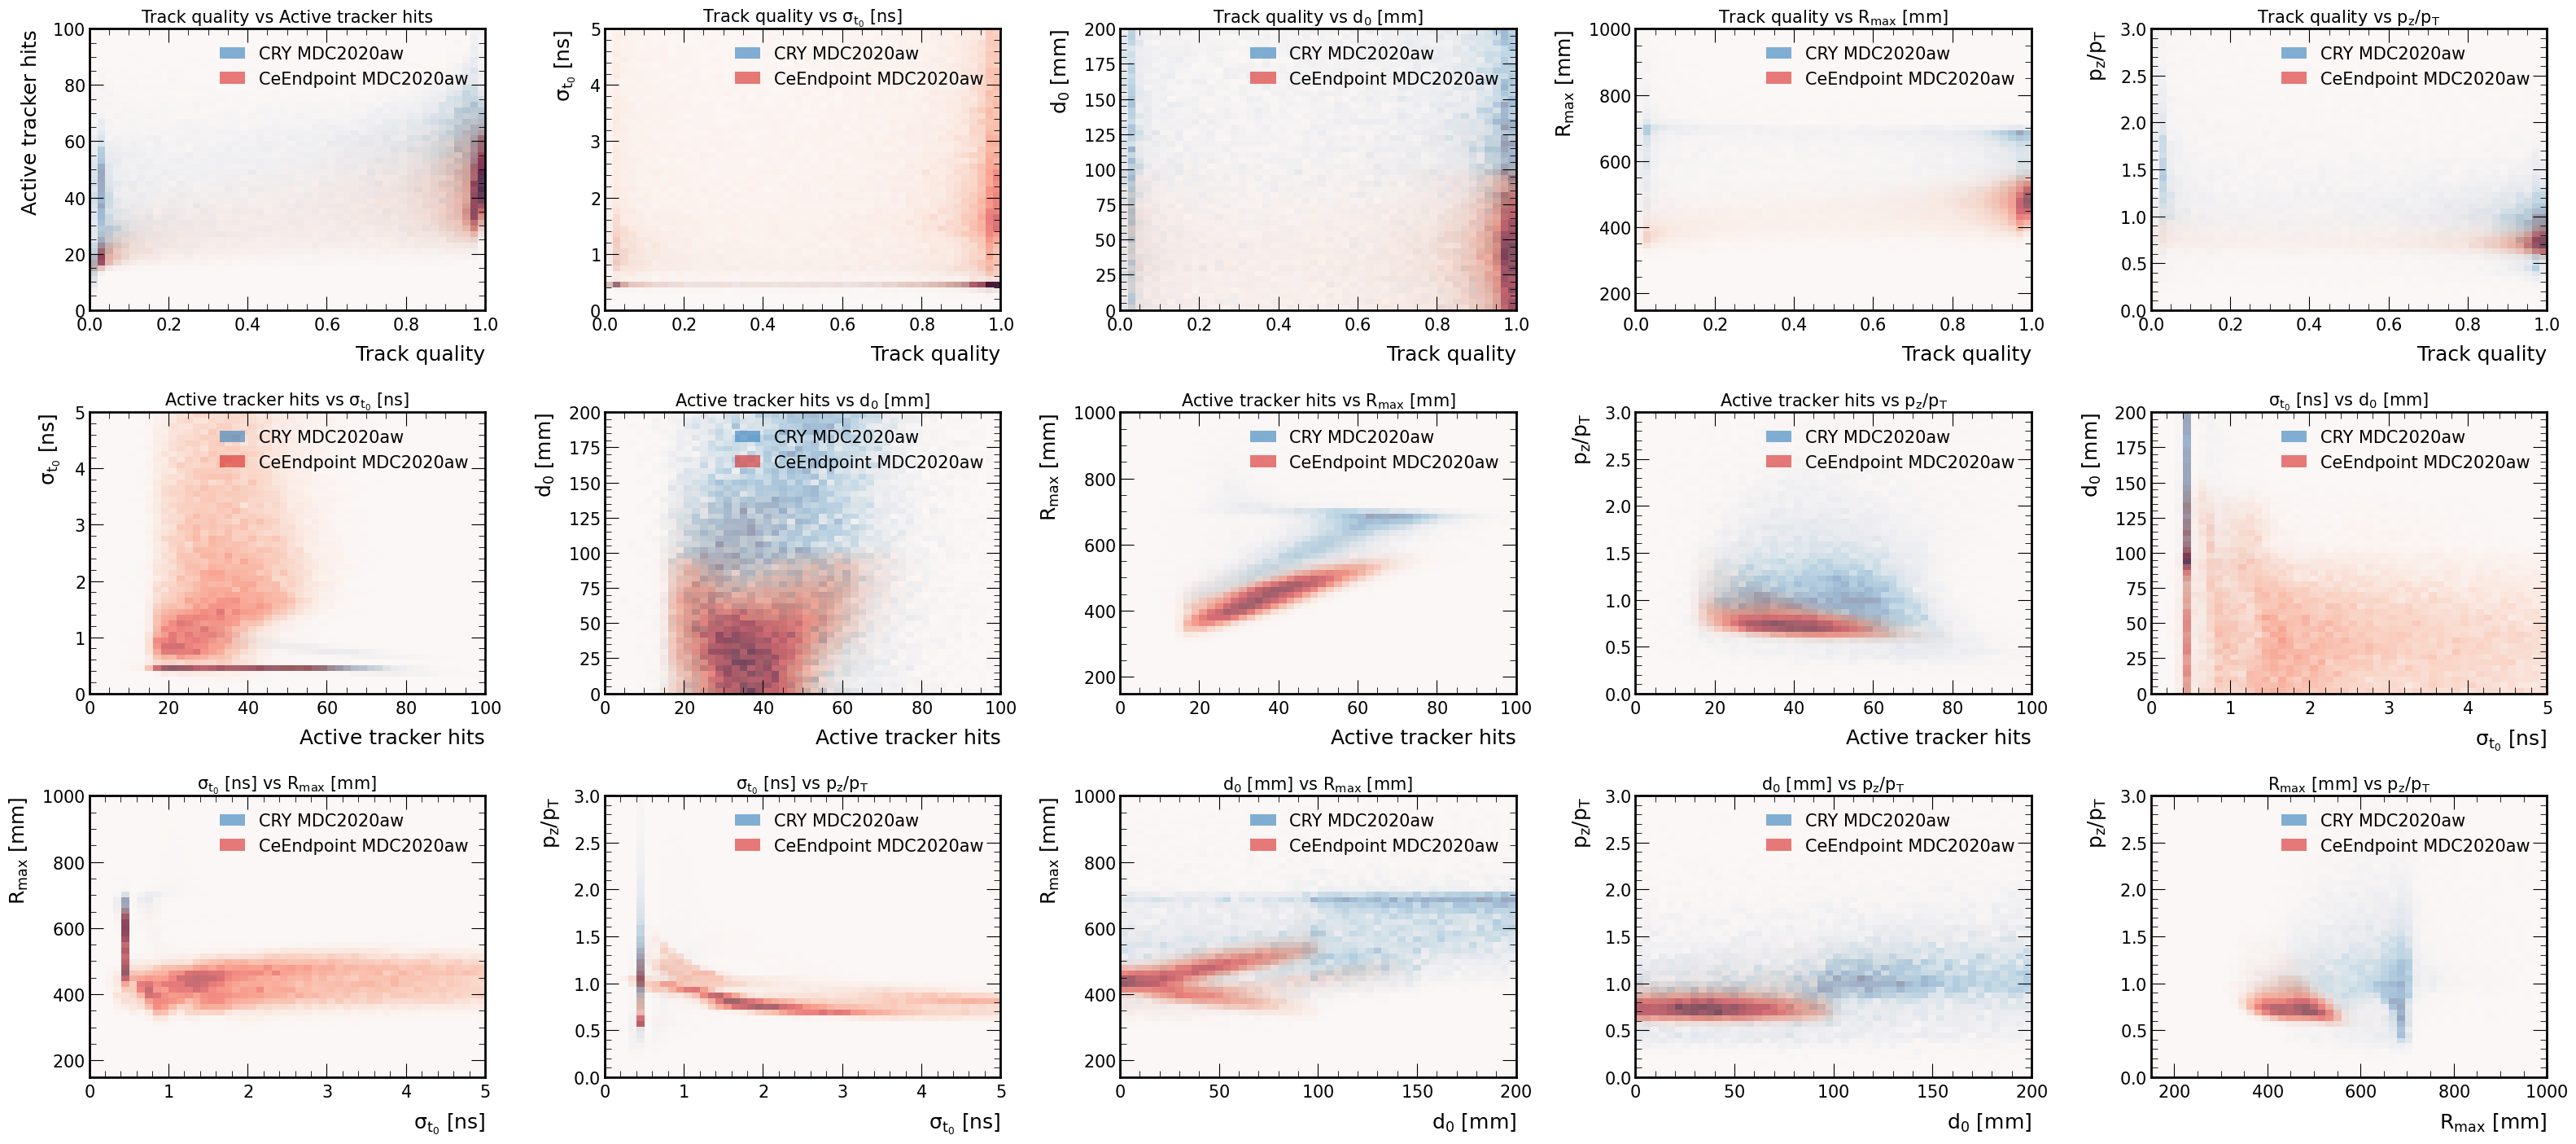

In [46]:
# Get the flattened arrays
trkqual, nactive, t0err, d0, lhr_max, pitch_angle = get_flat_arrays(results, labels=["CRY MDC2020aw", "CeEndpoint MDC2020aw"])

# Create all possible 2D overlay combinations (15 total combinations for 6 parameters)
fig, ax = plt.subplots(3, 5, figsize=(5*6.4, 3*4.8))

# Transparency for overlays
alpha = 0.6

# Parameter information: [data, label, bins, min, max]
params = {
    "trkqual": [trkqual, "Track quality", 50, 0, 1],
    "nactive": [nactive, "Active tracker hits", 50, 0, 100], 
    "t0err": [t0err, r"$\sigma_{t_{0}}$ [ns]", 50, 0, 5],
    "d0": [d0, r"$d_{0}$ [mm]", 50, 0, 200],
    "lhr_max": [lhr_max, r"$R_{\text{max}}$ [mm]", 50, 150, 1000],
    "pitch_angle": [pitch_angle, r"$p_{z}/p_{T}$", 50, 0, 3.0]
}

param_names = list(params.keys())
plot_idx = 0

# Generate all unique combinations
for i in range(len(param_names)):
    for j in range(i+1, len(param_names)):
        x_param = param_names[i]
        y_param = param_names[j]
        
        # Get plot position
        row = plot_idx // 5
        col = plot_idx % 5
        
        # Get parameter data and settings
        x_data, x_label, x_bins, x_min, x_max = params[x_param]
        y_data, y_label, y_bins, y_min, y_max = params[y_param]
        
        plotter.plot_2D_overlay(
            # First dataset (cosmic)
            x1=x_data[datasets[1]],
            y1=y_data[datasets[1]],
            # Second dataset (signal)
            x2=x_data[datasets[3]],
            y2=y_data[datasets[3]],
            # Binning
            nbins_x=x_bins, xmin=x_min, xmax=x_max,
            nbins_y=y_bins, ymin=y_min, ymax=y_max,
            # Styling
            cmap1="Blues", cmap2="Reds", alpha=alpha,
            labels=["CRY MDC2020aw", "CeEndpoint MDC2020aw"],
            # Labels
            xlabel=x_label,
            ylabel=y_label,
            title=f"{x_label} vs {y_label}",
            ax=ax[row, col], show=False, 
            leg_pos="upper right" if plot_idx == 0 else None
        )
        
        plot_idx += 1

# Remove empty subplots (we have 15 combinations, so no empty plots in 3x5 grid)
plt.tight_layout()
out_path = "../../output/images/comp/h2o_all_combinations_trk_params_overlay_aw.png"
plt.savefig(out_path, dpi=300)
print(f"Wrote {out_path}")
plt.show()

[pyvector] ✅ Created 3D 'mom' vector
[pyvector] ✅ Created 3D 'mom' vector

Spearman correlation


,Label,Spearman $\rho$,Strength
0,CeEndpoint: Track quality vs Active tracker hits,0.536,Strong
1,CRY: Track quality vs Active tracker hits,0.381,Moderate
2,CeEndpoint: Track quality vs $\sigma_{t_{0}}$ ...,0.164,Weak
3,CRY: Track quality vs $\sigma_{t_{0}}$ [ns],-0.250,Weak
4,CeEndpoint: Track quality vs $d_{0}$ [mm],-0.007,None
5,CRY: Track quality vs $d_{0}$ [mm],-0.137,Weak
6,CeEndpoint: Track quality vs $R_{\text{max}}$ ...,0.385,Moderate
7,CRY: Track quality vs $R_{\text{max}}$ [mm],-0.143,Weak
8,CeEndpoint: Track quality vs $p_{z}/p_{T}$,-0.195,Weak
9,CRY: Track quality vs $p_{z}/p_{T}$,-0.425,Moderate


Wrote ../../output/images/comp/h2o_all_combinations_trk_params_overlay_aw.png


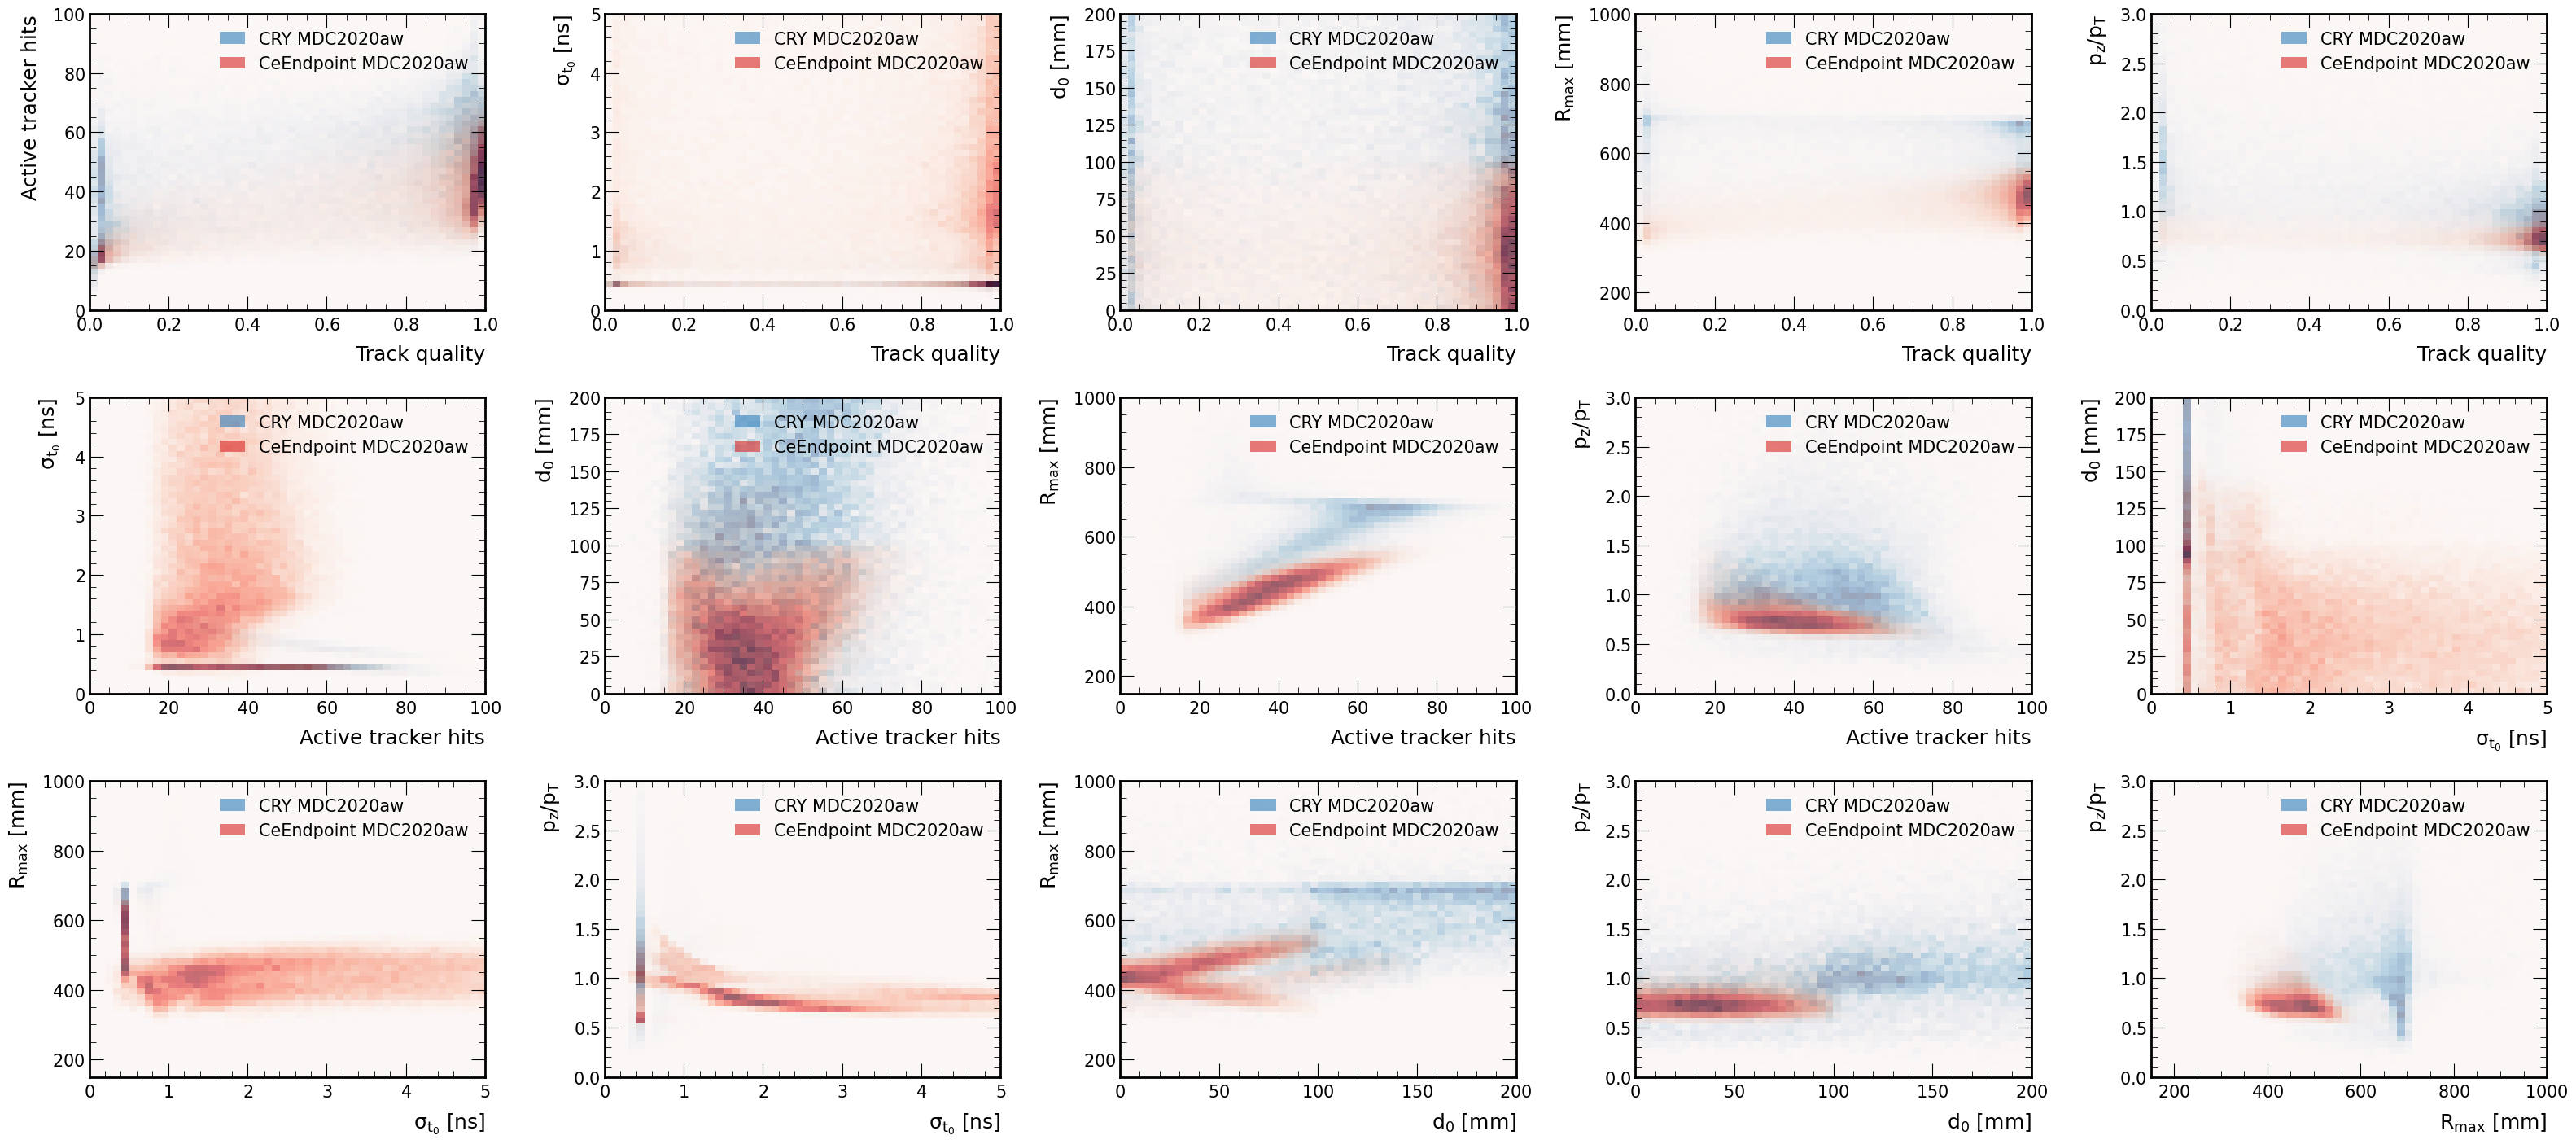

In [59]:
# Import required libraries for correlation analysis
import awkward as ak
import pandas as pd
from scipy.stats import spearmanr

def compute_spearmanr(x, y):
    """
    Spearman correlation coefficients
    """
    x_np = ak.to_numpy(x)
    y_np = ak.to_numpy(y)
    
    # Handle missing or infinite values
    mask = (~pd.isnull(x_np)) & (~pd.isnull(y_np)) & (~pd.isna(x_np)) & (~pd.isna(y_np))
    x_np = x_np[mask]
    y_np = y_np[mask]
    
    if len(x_np) < 2:
        return float("nan")
    # Get coefficients
    spearman_r, _ = spearmanr(x_np, y_np)
                              
    return spearman_r

def classify(r):
    """Classify the strength of correlation based on |r|"""
    r_abs = abs(r)
    if r_abs < 0.1:
        return "None"
    elif r_abs < 0.3:
        return "Weak"
    elif r_abs < 0.5:
        return "Moderate"
    else:
        return "Strong"

def summarise_correlations(data_dict):
    """
    data_dict: dict of form {
        'Label': (x_array, y_array)
    }
    """
    rows = []
    for label, (x, y) in data_dict.items():
        spearman_r = compute_spearmanr(x, y)
        rows.append({
            "Label": label,
            r"Spearman $\rho$": spearman_r,
            "Strength": classify(spearman_r)
        })
    df = pd.DataFrame(rows)
    return df

# Get the flattened arrays
trkqual, nactive, t0err, d0, lhr_max, pitch_angle = get_flat_arrays(results, labels=["CRY MDC2020aw", "CeEndpoint MDC2020aw"])

# Create all possible 2D overlay combinations (15 total combinations for 6 parameters)
fig, ax = plt.subplots(3, 5, figsize=(5*6.4, 3*4.8))

# Transparency for overlays
alpha = 0.6

# Parameter information: [data, label, bins, min, max]
params = {
    "trkqual": [trkqual, "Track quality", 50, 0, 1],
    "nactive": [nactive, "Active tracker hits", 50, 0, 100], 
    "t0err": [t0err, r"$\sigma_{t_{0}}$ [ns]", 50, 0, 5],
    "d0": [d0, r"$d_{0}$ [mm]", 50, 0, 200],
    "lhr_max": [lhr_max, r"$R_{\text{max}}$ [mm]", 50, 150, 1000],
    "pitch_angle": [pitch_angle, r"$p_{z}/p_{T}$", 50, 0, 3.0]
}

param_names = list(params.keys())
plot_idx = 0

# Generate all unique combinations
for i in range(len(param_names)):
    for j in range(i+1, len(param_names)):
        x_param = param_names[i]
        y_param = param_names[j]
        
        # Get plot position
        row = plot_idx // 5
        col = plot_idx % 5
        
        # Get parameter data and settings
        x_data, x_label, x_bins, x_min, x_max = params[x_param]
        y_data, y_label, y_bins, y_min, y_max = params[y_param]
        
        plotter.plot_2D_overlay(
            # First dataset (cosmic)
            x1=x_data[datasets[1]],
            y1=y_data[datasets[1]],
            # Second dataset (signal)
            x2=x_data[datasets[3]],
            y2=y_data[datasets[3]],
            # Binning
            nbins_x=x_bins, xmin=x_min, xmax=x_max,
            nbins_y=y_bins, ymin=y_min, ymax=y_max,
            # Styling
            cmap1="Blues", cmap2="Reds", alpha=alpha,
            labels=["CRY MDC2020aw", "CeEndpoint MDC2020aw"],
            # Labels
            xlabel=x_label,
            ylabel=y_label,
            # title=f"{x_label} vs {y_label}",
            ax=ax[row, col], show=False, 
            leg_pos="upper right" if plot_idx == 0 else None
        )
        
        plot_idx += 1

# Compute correlations for all parameter combinations
correlation_data = {}

# Generate all unique combinations for correlation analysis
for i in range(len(param_names)):
    for j in range(i+1, len(param_names)):
        x_param = param_names[i]
        y_param = param_names[j]
        
        # Get parameter data and labels
        x_data, x_label, _, _, _ = params[x_param]
        y_data, y_label, _, _, _ = params[y_param]
        
        # Add correlations for both datasets
        correlation_data[f"CeEndpoint: {x_label} vs {y_label}"] = (x_data[datasets[3]], y_data[datasets[3]])
        correlation_data[f"CRY: {x_label} vs {y_label}"] = (x_data[datasets[1]], y_data[datasets[1]])

# Compute and display correlations
correlations = summarise_correlations(correlation_data)
print("\nSpearman correlation")
print("="*60)
display(correlations.round(3)) 

# Remove empty subplots (we have 15 combinations, so no empty plots in 3x5 grid)
plt.tight_layout()
out_path = "../../output/images/comp/h2o_all_combinations_trk_params_overlay_aw.png"
plt.savefig(out_path, dpi=300)
print(f"Wrote {out_path}")
plt.show()

In [58]:
out_path = "../../output/correlations/onspill_aw_corr.csv"
correlations.round(3).to_csv(out_path, index=False)
print(f"Wrote {out_path}")

Wrote ../../output/correlations/onspill_aw_corr.csv


In [57]:
!mkdir ../../output/correlations

[pyvector] ✅ Created 3D 'mom' vector
[pyvector] ✅ Created 3D 'mom' vector


,Parameter Pair,CRY Spearman ρ,CRY Strength,CeEndpoint Spearman ρ,CeEndpoint Strength
0,$R_{\text{max}}$ [mm] vs $p_{z}/p_{T}$,-0.353661,Moderate,0.014706,None
1,$\sigma_{t_{0}}$ [ns] vs $R_{\text{max}}$ [mm],0.266418,Weak,-0.17343,Weak
2,$\sigma_{t_{0}}$ [ns] vs $d_{0}$ [mm],-0.118371,Weak,-0.346121,Moderate
3,$\sigma_{t_{0}}$ [ns] vs $p_{z}/p_{T}$,-0.622911,Strong,-0.031971,None
4,$d_{0}$ [mm] vs $R_{\text{max}}$ [mm],0.246755,Weak,0.36368,Moderate
5,$d_{0}$ [mm] vs $p_{z}/p_{T}$,0.178968,Weak,0.423617,Moderate
6,Active tracker hits vs $R_{\text{max}}$ [mm],0.797846,Strong,0.386543,Moderate
7,Active tracker hits vs $\sigma_{t_{0}}$ [ns],0.403829,Moderate,-0.540601,Strong
8,Active tracker hits vs $d_{0}$ [mm],0.077475,None,0.304887,Moderate
9,Active tracker hits vs $p_{z}/p_{T}$,-0.490708,Moderate,-0.151082,Weak


Wrote ../../output/correlations/onspill_aw_corr.csv
Wrote ../../output/images/comp/h2o_all_combinations_trk_params_overlay_aw.png


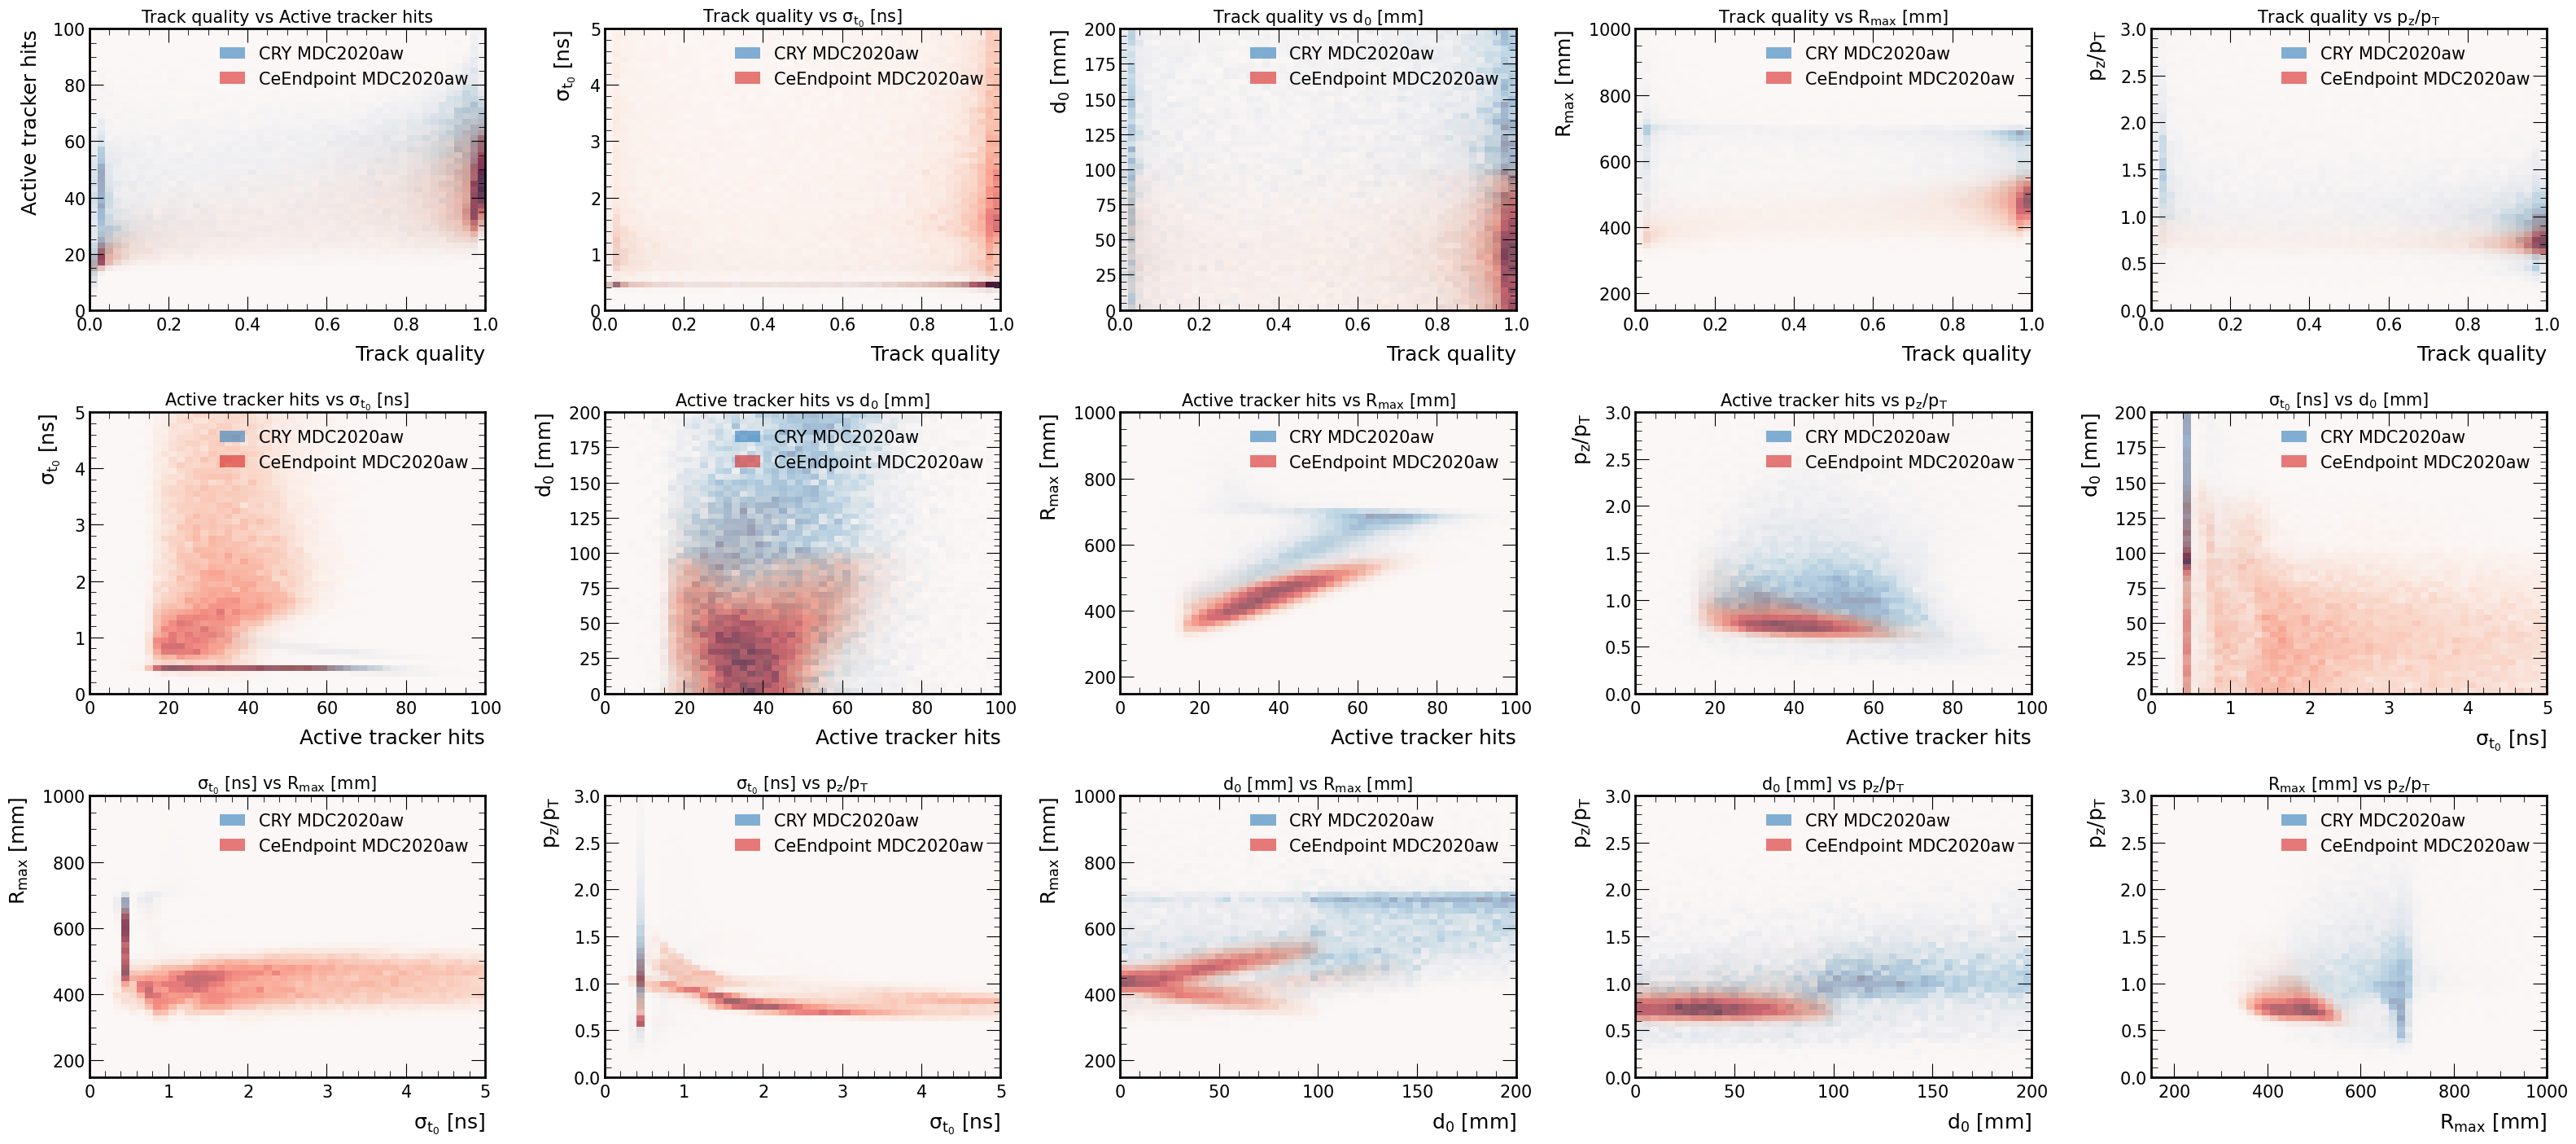

In [72]:
# Import required libraries for correlation analysis
import awkward as ak
import pandas as pd
from scipy.stats import spearmanr

def compute_spearmanr(x, y):
    """
    Spearman correlation coefficients
    """
    x_np = ak.to_numpy(x)
    y_np = ak.to_numpy(y)
    
    # Handle missing or infinite values
    mask = (~pd.isnull(x_np)) & (~pd.isnull(y_np)) & (~pd.isna(x_np)) & (~pd.isna(y_np))
    x_np = x_np[mask]
    y_np = y_np[mask]
    
    if len(x_np) < 2:
        return float("nan")
    # Get coefficients
    spearman_r, _ = spearmanr(x_np, y_np)
                              
    return spearman_r

def classify(r):
    """Classify the strength of correlation based on |r|"""
    r_abs = abs(r)
    if r_abs < 0.1:
        return "None"
    elif r_abs < 0.3:
        return "Weak"
    elif r_abs < 0.5:
        return "Moderate"
    else:
        return "Strong"

def summarise_correlations(data_dict):
    """
    data_dict: dict of form {
        "Label": (x_array, y_array)
    }
    """
    rows = []
    for label, (x, y) in data_dict.items():
        spearman_r = compute_spearmanr(x, y)
        rows.append({
            "Label": label,
            r"Spearman $\rho$": spearman_r,
            "Strength": classify(spearman_r)
        })
    df = pd.DataFrame(rows)
    return df

# Get the flattened arrays
trkqual, nactive, t0err, d0, lhr_max, pitch_angle = get_flat_arrays(results, labels=['CRY MDC2020aw', 'CeEndpoint MDC2020aw'])

# Create all possible 2D overlay combinations (15 total combinations for 6 parameters)
fig, ax = plt.subplots(3, 5, figsize=(5*6.4, 3*4.8))

# Transparency for overlays
alpha = 0.6

# Parameter information: [data, label, bins, min, max]
params = {
    'trkqual': [trkqual, "Track quality", 50, 0, 1],
    'nactive': [nactive, "Active tracker hits", 50, 0, 100], 
    't0err': [t0err, r"$\sigma_{t_{0}}$ [ns]", 50, 0, 5],
    'd0': [d0, r"$d_{0}$ [mm]", 50, 0, 200],
    'lhr_max': [lhr_max, r"$R_{\text{max}}$ [mm]", 50, 150, 1000],
    'pitch_angle': [pitch_angle, r"$p_{z}/p_{T}$", 50, 0, 3.0]
}

param_names = list(params.keys())
plot_idx = 0

# Generate all unique combinations
for i in range(len(param_names)):
    for j in range(i+1, len(param_names)):
        x_param = param_names[i]
        y_param = param_names[j]
        
        # Get plot position
        row = plot_idx // 5
        col = plot_idx % 5
        
        # Get parameter data and settings
        x_data, x_label, x_bins, x_min, x_max = params[x_param]
        y_data, y_label, y_bins, y_min, y_max = params[y_param]
        
        plotter.plot_2D_overlay(
            # First dataset (cosmic)
            x1=x_data[datasets[1]],
            y1=y_data[datasets[1]],
            # Second dataset (signal)
            x2=x_data[datasets[3]],
            y2=y_data[datasets[3]],
            # Binning
            nbins_x=x_bins, xmin=x_min, xmax=x_max,
            nbins_y=y_bins, ymin=y_min, ymax=y_max,
            # Styling
            cmap1="Blues", cmap2="Reds", alpha=alpha,
            labels=["CRY MDC2020aw", "CeEndpoint MDC2020aw"],
            # Labels
            xlabel=x_label,
            ylabel=y_label,
            title=f"{x_label} vs {y_label}",
            ax=ax[row, col], show=False, 
            leg_pos="upper right" if plot_idx == 0 else None
        )
        
        plot_idx += 1

# Compute correlations for all parameter combinations
correlation_data = {}

# Generate all unique combinations for correlation analysis
for i in range(len(param_names)):
    for j in range(i+1, len(param_names)):
        x_param = param_names[i]
        y_param = param_names[j]
        
        # Get parameter data and labels
        x_data, x_label, _, _, _ = params[x_param]
        y_data, y_label, _, _, _ = params[y_param]
        
        # Add correlations for both datasets
        correlation_data[f"CeEndpoint: {x_label} vs {y_label}"] = (x_data[datasets[3]], y_data[datasets[3]])
        correlation_data[f"CRY: {x_label} vs {y_label}"] = (x_data[datasets[1]], y_data[datasets[1]])

# Compute correlations
correlations = summarise_correlations(correlation_data)

# Restructure the dataframe to have CRY and CeEndpoint in separate columns
correlations['Dataset'] = correlations['Label'].str.split(':').str[0]
correlations['Parameter Pair'] = correlations['Label'].str.split(': ').str[1]

# Pivot to get CRY and CeEndpoint as columns
correlations_pivot = correlations.pivot(index='Parameter Pair', columns='Dataset', 
                                       values=['Spearman $\\rho$', 'Strength']).reset_index()

# Flatten column names
correlations_pivot.columns = ['Parameter Pair', 
                             'CeEndpoint Spearman ρ', 'CRY Spearman ρ',
                             'CeEndpoint Strength', 'CRY Strength']

# Reorder columns
correlations_pivot = correlations_pivot[['Parameter Pair', 'CRY Spearman ρ', 'CRY Strength', 
                                       'CeEndpoint Spearman ρ', 'CeEndpoint Strength']]

# print("\nSpearman Correlation Analysis:")
# print("="*100)
# print(correlations_pivot.to_string(index=False, float_format='{:.3f}'.format))

# Save to CSV
out_path = "../../output/correlations/onspill_aw_corr.csv"
display(correlations_pivot.round(3))
correlations_pivot.round(3).to_csv(out_path, index=False)
print(f"Wrote {out_path}")

plt.tight_layout()
out_path = "../../output/images/comp/h2o_all_combinations_trk_params_overlay_aw.png"
plt.savefig(out_path, dpi=300)
print(f"Wrote {out_path}")
plt.show()

In [73]:
display(correlations_pivot.round(1))

,Parameter Pair,CRY Spearman ρ,CRY Strength,CeEndpoint Spearman ρ,CeEndpoint Strength
0,$R_{\text{max}}$ [mm] vs $p_{z}/p_{T}$,-0.353661,Moderate,0.014706,None
1,$\sigma_{t_{0}}$ [ns] vs $R_{\text{max}}$ [mm],0.266418,Weak,-0.17343,Weak
2,$\sigma_{t_{0}}$ [ns] vs $d_{0}$ [mm],-0.118371,Weak,-0.346121,Moderate
3,$\sigma_{t_{0}}$ [ns] vs $p_{z}/p_{T}$,-0.622911,Strong,-0.031971,None
4,$d_{0}$ [mm] vs $R_{\text{max}}$ [mm],0.246755,Weak,0.36368,Moderate
5,$d_{0}$ [mm] vs $p_{z}/p_{T}$,0.178968,Weak,0.423617,Moderate
6,Active tracker hits vs $R_{\text{max}}$ [mm],0.797846,Strong,0.386543,Moderate
7,Active tracker hits vs $\sigma_{t_{0}}$ [ns],0.403829,Moderate,-0.540601,Strong
8,Active tracker hits vs $d_{0}$ [mm],0.077475,None,0.304887,Moderate
9,Active tracker hits vs $p_{z}/p_{T}$,-0.490708,Moderate,-0.151082,Weak
